# Exercise 03

Written By: Aiden Zelakiewicz (asz39@cornell.edu)

Inspired By: [2022 Cornell REU Python Workshop Part 03](https://github.com/CUAstro-REU-Python-Workshop/2022-workshop)

In this exercise, we will go over many useful Python packages for astronomy and some of their features. Three of the big package we will overview are `numpy`, `astropy`, and `scipy`. For `numpy` in particular, I will overview some useful features of the package we did not go over in the prior exercises. We will also splash in some `matplotlib` to visualize many of the concepts we will go over. All of these packages work well together, so you should notice some overlap as we proceed.

## Numpy

In [1]:
import numpy as np

In [2]:
# Equally spaced points
x_lin = np.linspace(0, 10, 100)

# Logarithmically spaced points
x_log = np.logspace(0, 1, 100)

# Random points
x_rand = np.random.rand(100)

### Manipulating Arrays

Often you have an array that has varying types of data, some of which 

Let's practice some of these techniques on real data from UKIRT observations. In this folder is a single CMD from yours truly which contains the $K$-band and $H-K$ color, stored in `ukirt.csv`.

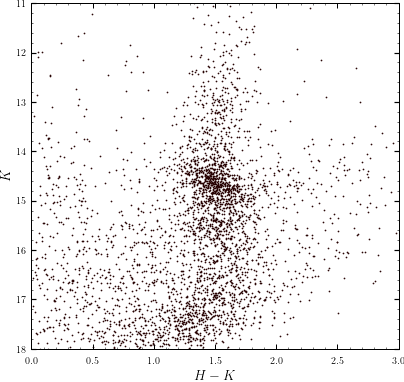

In [17]:
# Read in UKIRT data, has header K, H-K
ukirt = np.loadtxt('ukirt.csv', delimiter=',', skiprows=1)

import matplotlib.pyplot as plt
plt.style.use('az-paper-twocol')

# We will use this more than once, so let's define a function!
# Remember DRY: Don't Repeat Yourself
def plot_cmd(array):
    fig, ax = plt.subplots(1, 1, figsize=(6,6))
    ax.scatter(array[:,1], array[:,0], s=.5, c='#260101') # You can also use hex colors
    ax.set_xlabel(r'$H-K$')
    ax.set_ylabel(r'$K$')
    ax.set_xlim(0., 3.)
    ax.set_ylim(18., 11.) # This reverses the y-axis

    plt.show()

plot_cmd(ukirt)

#### Where
This field is used to calculate the extinction (amount of light blocked from observer) in the Milky Way. Let's say we want to isolate stars with $K$-band magnitude between [12,16]. In vanilla Python, one might think to loop (or list comprehension) the entire dataset. Luckily, `numpy` has useful functions like `np.where()` which can do exactly this thing! It will return the indices where a specific condition is met on an array.

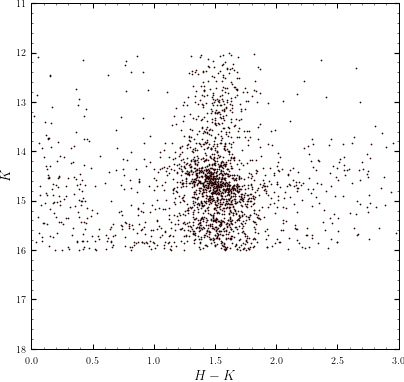

In [22]:
# Let's isolate the stars with K magnitudes between 12 and 16
# We can combine conditions with & (and) and | (or)
inds = np.where((ukirt[:,0] <= 16) & (ukirt[:,0] >= 12))

# Isolate the data
ukirt_sub = ukirt[inds]

plot_cmd(ukirt_sub) # Yay function!

A good logical way to understand what happens is your condition creates an array of `booleans`, which you then pass to `np.where()` to return the index at which those `booleans` are `True`. 

#### Argsort

You may need to sort your data, which `np.argsort()` may be useful. It return the indices for which the data would be sorted.

In [24]:
# Argsort returns the indices that would sort the array

# Sort by K magnitude
inds = np.argsort(ukirt[:,0])
ukirt_sorted = ukirt[inds]

print(ukirt_sorted)

[[ 9.871  1.144]
 [10.042  1.144]
 [10.611  1.362]
 ...
 [18.259  0.777]
 [18.412 -0.409]
 [18.516  0.533]]


#### Percentile

Getting the value at a specific percentile in an `ndarray` is very useful for a number of cases. One I imediately think of is setting colorbar scales for data, where outliers can make your figure unreadable! Let's find the 90\% value of $H-K$ color using `np.percentile()`.

In [25]:
# Get stars above 10% in H-K using np.percentile
np.percentile(ukirt[:,1], 90)

1.8701000000000008

#### <---TO DO--->

Quick wake up activity!
Combine `np.where()` and `np.percentile()` to get all the stars above the 10th percentile in $H-K$ color AS WELL AS all of the stars within the [12,16] range of $K$-band magnitude.
Then plot these stars using the function we made!
This is to show the power of combining various `numpy` functions to quickly achieve a somewhat difficult result!

If this seems like a lot to do, remember you can break it up into tiny chunks!

In [ ]:
### YOUR CODE HERE

## Astropy

### Units and Constants

One of the most useful features of `astropy` is its ability to handle units (the module is named `units`). If you assign a variable a unit, you can ask `astropy` to convert it do a different standard or do calculations without having to convert things yourself. Don't tell my professors, but I haven't calculated unit conversions by hand in ages thanks to `astropy`. This module alone made using Python my go-to calculator, especially since they work with `numpy` functions!

Another module, which goes hand-in-hand with `astropy.units` is `astropy.constants`. Astropy has a lot of standard constants set, such as Boltzman's constant or Plank's constant.

There is a slight learning curve with using `astropy.units`, as you need to know how they define all of the units. Most, however, are very intuitive and you can always check the docs if you're confused!

In [5]:
# Usually people load astropy modules in seperately, rather than the entire package
import astropy.units as u
import astropy.constants as c # another common alias for this is 'const', I'm just lazy

# Create a unit of length
length = 26.2 * u.m

print(length)

print(length.to(u.cm))

26.2 m
2620.0 cm


## Scipy